<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 34: Residuals

Associated Textbook Sections: [15.5 - 15.6](https://ccsf-math-108.github.io/textbook/chapters/15/5/Visual_Diagnostics.html)

---

## Outline

* [Residuals](#Residuals)
* [Regression Diagnostics](#Regression-Diagnostics)
* [A Measure of Clustering](#A-Measure-of-Clustering)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Functions defined in previous lectures

def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

---

## Residuals

---

### Residuals

* Error in regression estimate
* One residual corresponding to each point (x, y)
* residual
    * = observed y - regression estimate of y
    *  = observed y - height of regression line at x
    *  = vertical distance between the point and the best line


---

### Demo: Residuals

Calculate and visualize the residuals associated with linear regression estimates for `Median Income` values based on `College%` in the `district_demographics2016.csv` data.

In [ ]:
demographics = Table.read_table('district_demographics2016.csv')
demographics

State,District,Median Income,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,30.3
Alabama,"Congressional District 6 (115th Congress), Alabama",61413,36.7
Alabama,"Congressional District 7 (115th Congress), Alabama",34664,19.4
Alaska,"Congressional District (at Large) (115th Congress), Alaska",76440,29.6
Arizona,"Congressional District 1 (115th Congress), Arizona",50537,24.5
Arizona,"Congressional District 2 (115th Congress), Arizona",49072,34


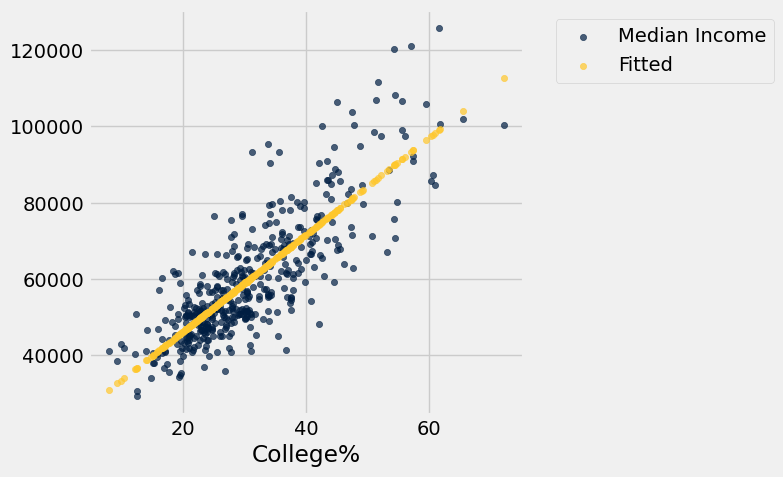

In [ ]:
predict_income = demographics.select('College%', 'Median Income')
predict_income = predict_income.with_columns('Fitted',
    fitted_values(demographics, 'College%', 'Median Income'))
predict_income.scatter('College%')

In [ ]:
demographics = demographics.drop(
    'State', 'District')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [ ]:
def residuals(t, x, y):
    predictions = fitted_values(t,x,y)
    return t.column(y)-predictions

In [ ]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


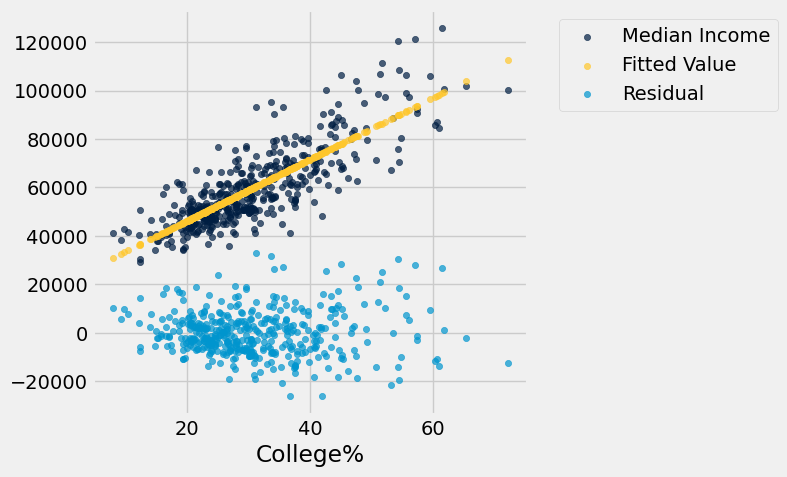

In [ ]:
demographics.scatter('College%')

In [ ]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

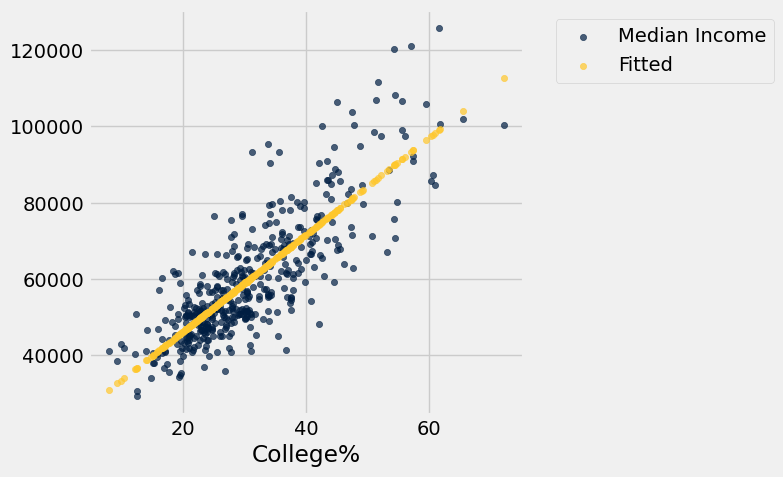

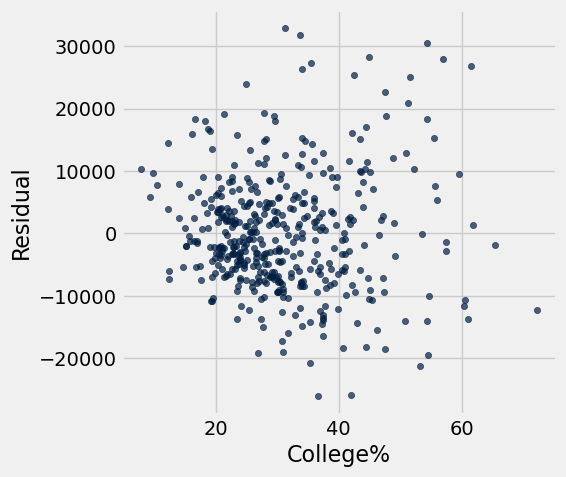

In [ ]:
plot_residuals(demographics, 'College%', 'Median Income')

---

### Demo: More Residuals

Visualize the residuals associated with the `family_heights.csv` data set when predicting `Child` values from `Midparent` values using linear regression.

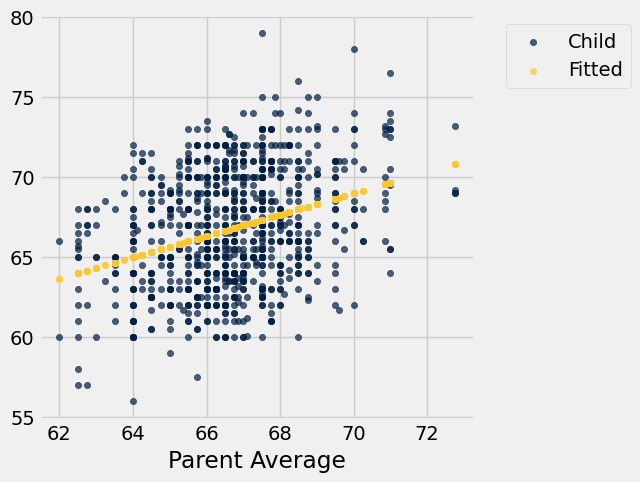

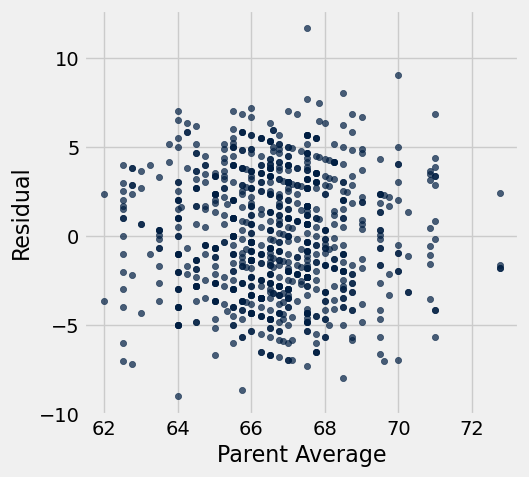

In [ ]:
family_heights = Table.read_table('family_heights.csv')
parents = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parents,
    'Child', family_heights.column('childHeight')
    )
plot_residuals(heights, 'Parent Average', 'Child')

### Examples: Scatter Plots from Residual Plots

* Generate some example data.
* Inspect residual plots with the goal of trying to visualize the related scatter plots.

*Note:* We do not cover `np.linspace` and `np.random.normal` in this course, so you are not expected to understand that part of the following code. We are just using those functions to conveniently create example data.

In [ ]:
np.random.seed(2024) # For reproducibility

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(-5, 5, 100)
x3 = np.linspace(0, 10, 100)

examples = Table().with_columns(
    'x1', x1,
    'y1', 2 * x1 + 1 + np.random.normal(0, 1, len(x1)),
    'x2', x2,
    'y2', 0.5 * x2**2 + 2 * x2 + 1 + np.random.normal(0, 1, len(x2)),
    'x3', x3,
    'y3', 2 * x3 + 1 + np.random.normal(0, 0.5 * x3, len(x3)),
)
examples = examples.with_columns(
    'residuals1', residuals(examples, 'x1', 'y1'),
    'residuals2', residuals(examples, 'x2', 'y2'),
    'residuals3', residuals(examples, 'x3', 'y3'),
)
examples

x1,y1,x2,y2,x3,y3,residuals1,residuals2,residuals3
0,2.66805,-5,3.58722,0,1,1.57743,8.286,-0.757601
0.10101,1.93937,-4.89899,3.30594,0.10101,1.30834,0.647955,7.80201,-0.618114
0.20202,1.2025,-4.79798,3.60429,0.20202,1.37656,-0.289704,7.89765,-0.718749
0.30303,1.45515,-4.69697,3.10742,0.30303,1.65453,-0.237852,7.19807,-0.609631
0.40404,2.72413,-4.59596,0.758999,0.40404,1.72197,0.830338,4.64694,-0.711049
0.505051,3.17043,-4.49495,3.24055,0.505051,2.26178,1.07584,6.92579,-0.3401
0.606061,-0.407841,-4.39394,1.16053,0.606061,2.54223,-2.70322,4.64305,-0.228504
0.707071,1.08885,-4.29293,-0.00340429,0.707071,1.23665,-1.40733,3.27641,-1.70294
0.808081,3.07615,-4.19192,1.80354,0.808081,2.82432,0.37918,4.88064,-0.284124
0.909091,2.92023,-4.09091,1.04097,0.909091,2.36869,0.0224699,3.91537,-0.908606


#### Example 1

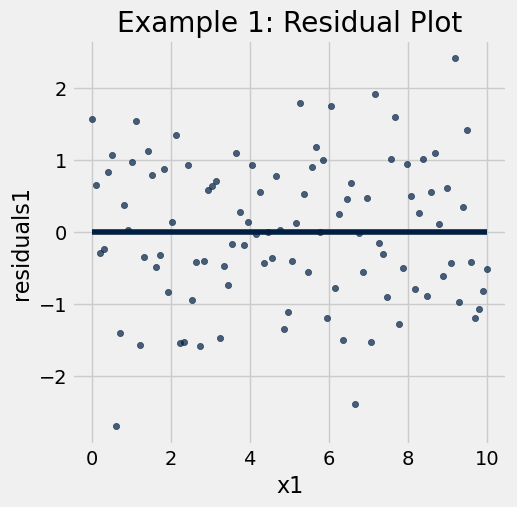

In [ ]:
examples.scatter('x1', 'residuals1', fit_line=True)
plt.title('Example 1: Residual Plot')
plt.show()

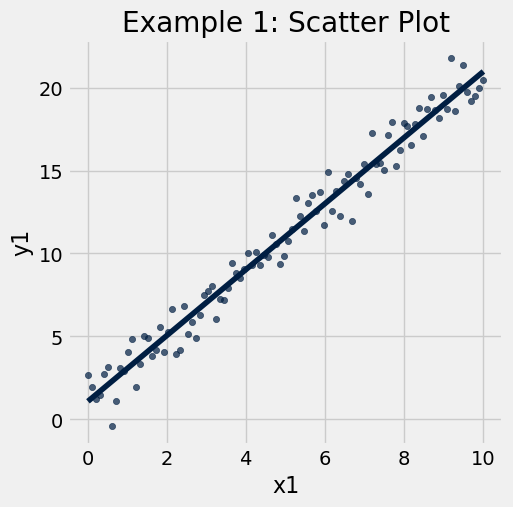

In [ ]:
examples.scatter('x1', 'y1', fit_line=True)
plt.title('Example 1: Scatter Plot')
plt.show()

#### Example 2

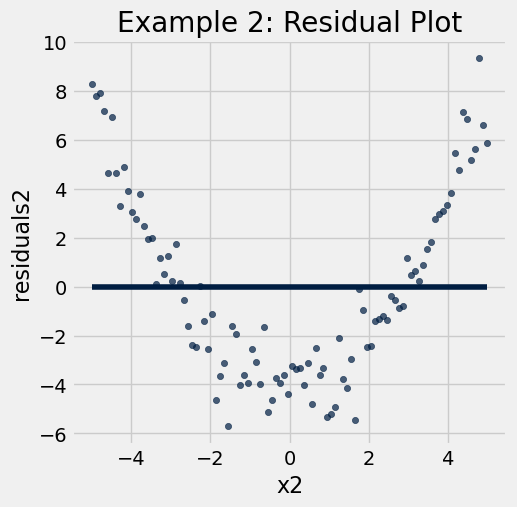

In [ ]:
examples.scatter('x2', 'residuals2', fit_line=True)
plt.title('Example 2: Residual Plot')
plt.show()

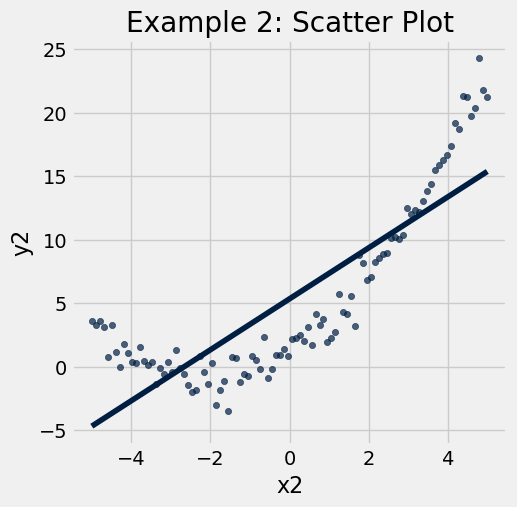

In [ ]:
examples.scatter('x2', 'y2', fit_line=True)
plt.title('Example 2: Scatter Plot')
plt.show()

#### Example 3

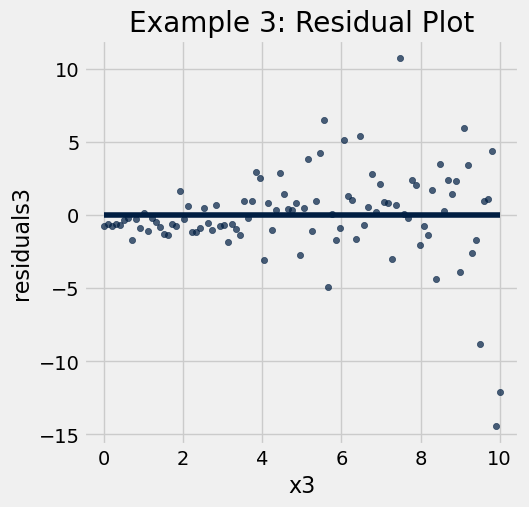

In [ ]:
examples.scatter('x3', 'residuals3', fit_line=True)
plt.title('Example 3: Residual Plot')
plt.show()

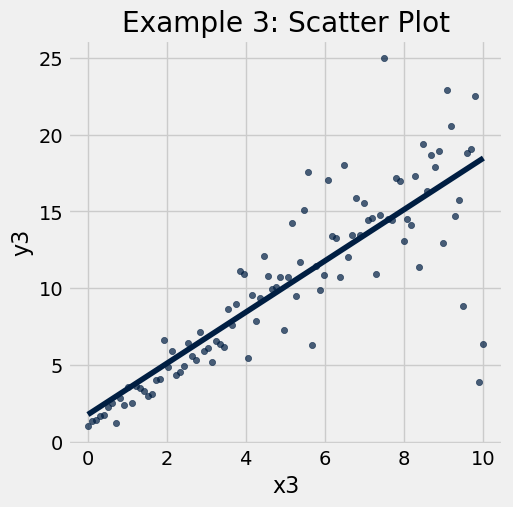

In [ ]:
examples.scatter('x3', 'y3', fit_line=True)
plt.title('Example 3: Scatter Plot')
plt.show()

---

## Regression Diagnostics

---

### Example: Dugongs

<a href="https://blogs.oregonstate.edu/gemmlab/2021/09/27/let-me-introduce-you-to-dugongs/" title="OSU Geospatial Ecology of Marine Megafauna Laboratory"><img src="./dugong_OSU.jpeg" alt="A drawing of a dugong" width=50%></a>

---

### Demo: Dugongs

* Visualize the relationship between a dugong's length and age based on the `dugong.csv` dataset.
* Although the data is not linear, calculate the correlation coefficient.
* Visualize the residuals associated with the linear regression prediction for a dugong's age based on its height.
* Determine if linear regression is a good choice for a prediction model in this case.

In [ ]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


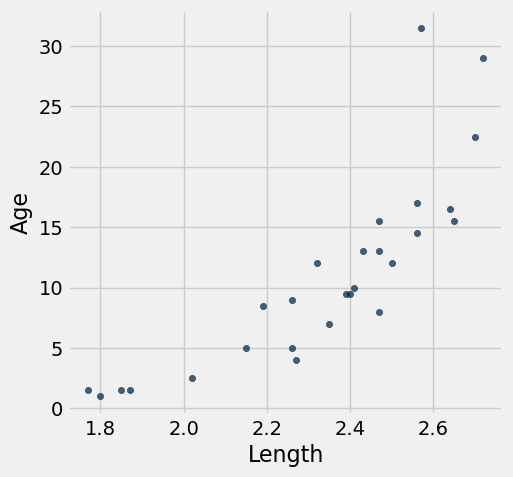

In [ ]:
dugong.scatter('Length','Age')

In [ ]:
correlation(dugong,'Length','Age')

0.82964745549057139

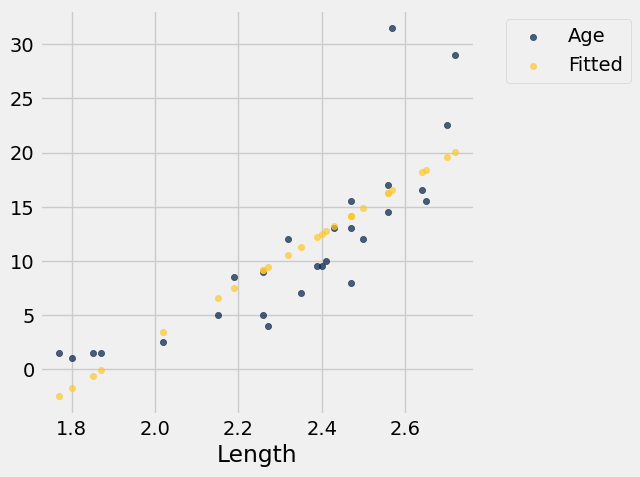

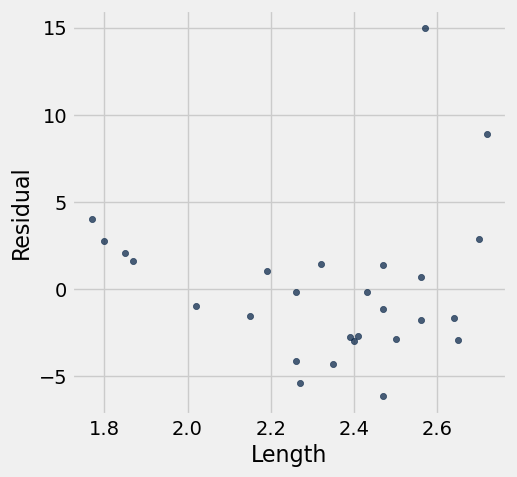

In [ ]:
plot_residuals(dugong,'Length','Age')

---

### Example: Blood Pressure

* A person's blood pressure reading consists of two numbers:
    * Systolic pressure (the top number) reflects the force produced by the heart when it pumps blood out to the body
    * Diastolic blood pressure (the bottom number) is the pressure in your blood vessels when the heart is at rest
* According to [Harvard Health](https://www.health.harvard.edu/staying-healthy/which-blood-pressure-number-is-important#:~:text=Over%20the%20years%2C%20research%20has,compared%20with%20elevated%20diastolic%20pressures.):
> Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures. That's especially true in people ages 50 and older, which is why doctors tend to monitor the top number more closely.



### Demo: US Blood Pressure

* Load recent blood pressure data from US residents (18+) according to the [most recent NHANES data](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023).
* Examine the residuals associated with average systolic pressure over the ages.
* Determine if linear regression is a good choice for a prediction model in this case.

In [ ]:
blood_pressure = Table.read_table('blood_pressure.csv')
blood_pressure

Age,Average Systolic average,Average Diastolic average
18,111.425,66.6425
19,109.872,67.7528
20,112.451,69.4379
21,111.262,68.3077
22,109.915,70.1273
23,111.902,71.0874
24,111.632,69.3793
25,111.354,70.2487
26,111.567,71.3743
27,112.363,71.3873


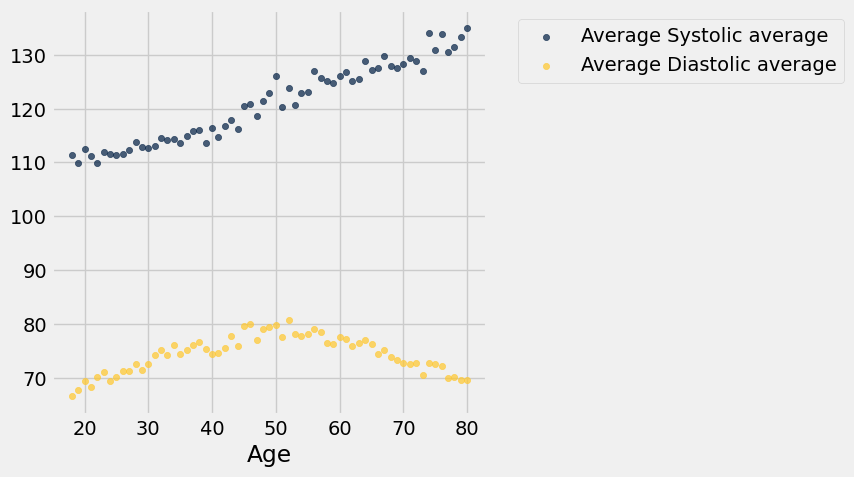

In [ ]:
blood_pressure.scatter('Age')

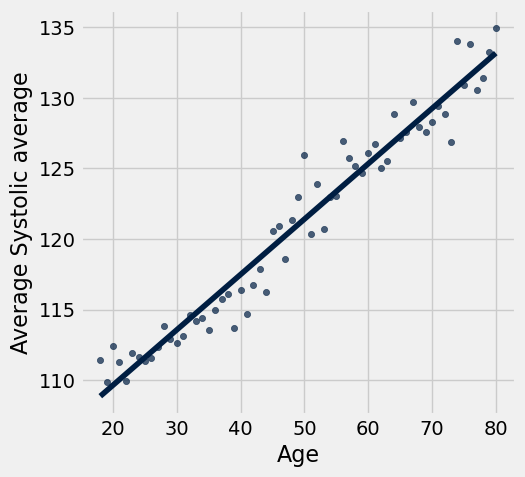

In [ ]:
blood_pressure.scatter('Age', 'Average Systolic average', fit_line=True)

In [ ]:
correlation(blood_pressure, 'Age', 'Average Systolic average')

0.97563534942670571

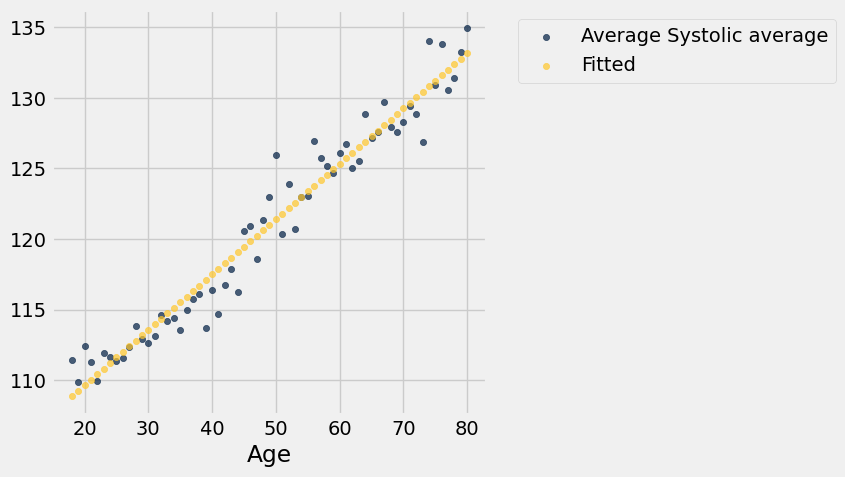

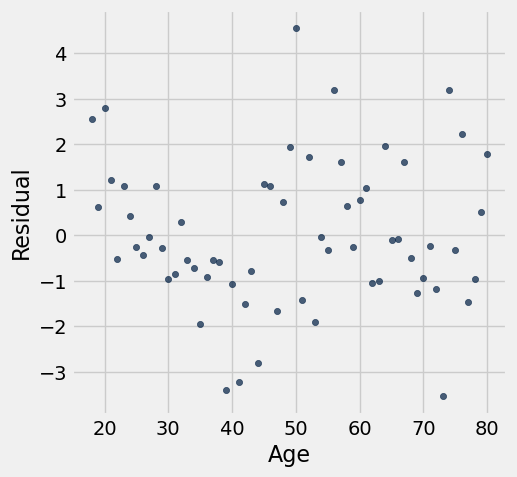

In [ ]:
plot_residuals(blood_pressure, 'Age', 'Average Systolic average')

_Be careful of the ecological correlation issue we have talked about previously._

---

### Residual Plot

A scatter diagram of residuals
* Should look like an unassociated blob for linear relations
* But will show patterns for non-linear relations
* Used to check whether linear regression is appropriate
* Look for curves, trends, changes in spread, outliers, or any other patterns


---

### Properties of Residuals

Residuals from a linear regression always have
* Zero mean (so rmse = SD of residuals)
* Zero correlation with $x$
* Zero correlation with the fitted values

---

#### Demo: Properties of Residuals

In [ ]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [ ]:
round(np.average(residuals(heights, 'Parent Average', 'Child')), 6)

0.0

In [ ]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [ ]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'Parent Average', 'Child'),
    'Fitted Value', fitted_values(heights, 'Parent Average', 'Child')
)

In [ ]:
round(correlation(heights, 'Parent Average', 'Residual'), 6)

0.0

In [ ]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

0.0

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>